In [1]:
### EXERCISE 13.8
### Generate data in two classes, with two features. These features
### are all independent Gaussian variates with standard deviation 1. Their
### mean vectors are (−1,−1) in class 1 and (1, 1) in class 2. To each feature
### vector apply a random rotation of angle θ, θ chosen uniformly from 0 to
### 2π. Generate 50 observations from each class to form the training set, and
### 500 in each class as the test set. Apply

# Setup 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal as GaussianRV
from numpy.random import uniform
import math
import pandas as pd

# Generate training dataset  
M=50
class1=GaussianRV([-1,-1],[[1,0],[0,1]],M)
theta1=uniform(low=0.,high=2.*np.pi,size=M)    
class2=GaussianRV([1,1],[[1,0],[0,1]],M)
theta2=uniform(low=0.,high=2.*np.pi,size=M)    
for i in np.arange(0,M):
    Rot=np.matrix([[math.cos(theta1[i]),-1.*math.sin(theta1[i])],
                    [math.sin(theta1[i]),math.cos(theta1[i])]])
    class1[i]=np.matmul(Rot,class1[i].T)
    Rot=np.matrix([[math.cos(theta2[i]),-1.*math.sin(theta2[i])],
                   [math.sin(theta2[i]),math.cos(theta2[i])]])
    class2[i]=np.matmul(Rot,class2[i].T)
Xtraining=np.concatenate((class1,class2))
Ytraining=np.concatenate((np.zeros(len(class1)),np.ones(len(class2))))

# Generate test dataset 
P=500
class1=np.asarray(GaussianRV([-1,-1],[[1,0],[0,1]],P))
theta1=uniform(low=0.,high=2.*np.pi,size=P)    
class2=np.asarray(GaussianRV([1,1],[[1,0],[0,1]],P))
theta2=uniform(low=0.,high=2.*np.pi,size=P) 
for i in np.arange(0,P):
    Rot=np.matrix([[math.cos(theta1[i]),-1.*math.sin(theta1[i])],
                    [math.sin(theta1[i]),math.cos(theta1[i])]])
    class1[i]=np.matmul(Rot,class1[i].T)
    Rot=np.matrix([[math.cos(theta2[i]),-1.*math.sin(theta2[i])],
                   [math.sin(theta2[i]),math.cos(theta2[i])]])
    class2[i]=np.matmul(Rot,class2[i].T)
Xtest=np.concatenate((class1,class2))
Ytest=np.concatenate((np.zeros(len(class1)),np.ones(len(class1))))

Text(0, 0.5, 'y')

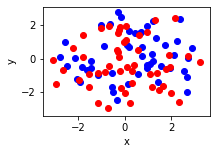

In [2]:
# Visualize training dataset 
fig=plt.figure(figsize=(3., 2.))
plt.scatter(Xtraining[:M,0],Xtraining[:M,1],c='blue')
plt.scatter(Xtraining[M:,0],Xtraining[M:,1],c='red')
plt.xlabel('x') ; plt.ylabel('y')

Text(0, 0.5, 'y')

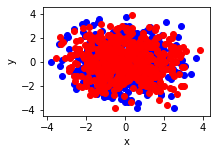

In [3]:
# Visualize test dataset 
fig=plt.figure(figsize=(3., 2.))
plt.scatter(Xtest[:P,0],Xtest[:P,1],c='blue')
plt.scatter(Xtest[P:,0],Xtest[P:,1],c='red')
plt.xlabel('x') ; plt.ylabel('y')

    model_complexity  neighbors_no    mean       std
0           0.041667            24  0.5328  0.029086
1           0.043478            23  0.5232  0.031849
2           0.045455            22  0.5068  0.023756
3           0.047619            21  0.5172  0.027616
4           0.050000            20  0.4912  0.029200
5           0.052632            19  0.5044  0.034771
6           0.055556            18  0.4656  0.028734
7           0.058824            17  0.4828  0.034098
8           0.062500            16  0.4524  0.037336
9           0.066667            15  0.4520  0.041332
10          0.071429            14  0.4692  0.031348
11          0.076923            13  0.4540  0.034034
12          0.083333            12  0.4688  0.023152
13          0.090909            11  0.4716  0.033995
14          0.100000            10  0.4956  0.028589
15          0.111111             9  0.4828  0.022825
16          0.125000             8  0.4860  0.024152
17          0.142857             7  0.4984  0.

Text(0, 0.5, 'CV error')

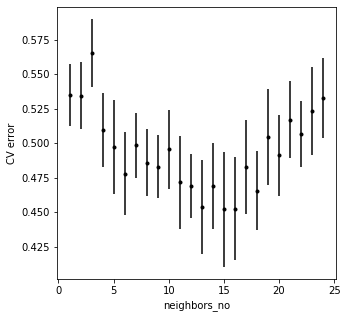

In [4]:
### Apply four different classifiers:
### In each case choose the number of neighbors by tenfold cross-validation.
### 1. Nearest-neighbors.
### scikit learn provide automatic algo 
### KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, 
###                      metric='minkowski', metric_params=None, n_jobs=None)

from sklearn.neighbors import KNeighborsClassifier
from numpy.random import choice

# implement 10-fold cross validation 
summary=pd.DataFrame(columns=['model_complexity','neighbors_no','test_error','fold_no','split_no'])
# split training dataset 
K=10
p=int(2*M/K)
for s in np.arange(0,25):
    indexlist=choice(np.arange(0,len(Xtraining)),size=(K,p),replace=False)
    # run over no. neighbors
    for k in np.arange(1,25):
        # estimate cross-validation error 
        for q in np.arange(0,K):
            # filter out cross-validation data
            indx=np.setdiff1d(indexlist.flatten(),indexlist[q])
            CVXtraining, CVYtraining=Xtraining[indx], Ytraining[indx] 
            CVXtest, CVYtest=Xtraining[indexlist[q]], Ytraining[indexlist[q]] 
            # train the model 
            model=KNeighborsClassifier(n_neighbors=k,algorithm='brute')
            model.fit(CVXtraining,CVYtraining)
            # calculate cross validation error 
            CVpreds=model.predict(CVXtest)
            df=pd.DataFrame({'true_data': CVYtest, 'model_predictions': CVpreds}
                           ).assign(model_complexity=1./k, neighbors_no=k, fold_no=q, split_no=s)
            df['misclassification_error']=(df['true_data']==df['model_predictions']
                                          ).apply(lambda z: 0 if z==True else 1)
            df=df.groupby(by=['model_complexity','neighbors_no','fold_no','split_no'])['misclassification_error'].sum().reset_index().rename(columns={'misclassification_error':'test_error'})
            summary=pd.concat([summary,df],sort=False)
summary=summary.groupby(by=['model_complexity','neighbors_no','split_no'])['test_error'].sum().reset_index()
summary['test_error']/=2*M
summary=summary.groupby(by=['model_complexity','neighbors_no'])['test_error'].agg(["mean","std"]).reset_index()
print(summary)

# Plot cross-validation error 
fig=plt.figure(figsize=(5., 5.))
plt.errorbar(summary['neighbors_no'].to_numpy(),summary['mean'].to_numpy(),yerr=summary['std'].to_numpy(),fmt='.k')
plt.xlabel('neighbors_no') ; plt.ylabel('CV error')

In [5]:
# calculate test error 
best_no_neighbors=float(summary.copy().loc[summary['mean']==np.min(summary['mean'].to_numpy()),'mean']
                       )+float(summary.copy().loc[summary['mean']==np.min(summary['mean'].to_numpy()),'std'])
summary=summary.assign(threshold=best_no_neighbors).query("mean<=threshold").sort_values(by=['neighbors_no'],ascending=True)
kbest=summary.copy()['neighbors_no'].iloc[0]

# train model on full dataset 
model=KNeighborsClassifier(n_neighbors=kbest,algorithm='brute')
model.fit(Xtraining,Ytraining)
print(model.get_params())

# calculate test error 
testpreds=model.predict(Xtest)
print("mean accuracy = {}".format(model.score(Xtest,Ytest)))
df=pd.DataFrame({'true_data': Ytest, 'model_predictions': testpreds}).assign(model_complexity=1./kbest, neighbors_no=kbest)
df['test_error']=(df['true_data']==df['model_predictions']).apply(lambda z: 0 if z==True else 1)
df=df.groupby(by=['model_complexity','neighbors_no'])['test_error'].mean().reset_index()
print("estimated test error = {}".format(float(df.test_error)))

{'algorithm': 'brute', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 6, 'p': 2, 'weights': 'uniform'}
mean accuracy = 0.514
estimated test error = 0.486


Text(0, 0.5, 'y')

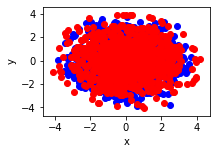

In [6]:
### 2. Nearest-neighbors with hints: ten randomly rotated versions of each
### data point are added to the training set before applying nearest-neighbors.

# Add hints
class1hints, Y1hints=[], []
class2hints, Y2hints=[], []
for i in np.arange(0,M):
    theta1=uniform(low=0.,high=2.*np.pi,size=10)
    theta2=uniform(low=0.,high=2.*np.pi,size=10)
    for j in np.arange(0,10):
        Rot=np.matrix([[math.cos(theta1[j]),-1.*math.sin(theta1[j])],
                        [math.sin(theta1[j]),math.cos(theta1[j])]])
        class1hints.append(np.matmul(Rot,class1[i].T).tolist()[0])
        Y1hints.append(0)
        Rot=np.matrix([[math.cos(theta2[j]),-1.*math.sin(theta2[j])],
                       [math.sin(theta2[j]),math.cos(theta2[j])]])
        class2hints.append(np.matmul(Rot,class2[i].T).tolist()[0])
        Y2hints.append(1)
Xtraining_new=np.concatenate((class1,class1hints,class2,class2hints))
Ytraining_new=np.concatenate((np.zeros(len(class1)),Y1hints,np.ones(len(class1)),Y2hints))
Mnew=int(0.5*len(Xtraining_new))

# Visualize training dataset 
fig=plt.figure(figsize=(3., 2.))
plt.scatter(Xtraining_new[:Mnew,0],Xtraining_new[:Mnew,1],c='blue')
plt.scatter(Xtraining_new[Mnew:,0],Xtraining_new[Mnew:,1],c='red')
plt.xlabel('x') ; plt.ylabel('y')


    model_complexity  neighbors_no     mean       std
0           0.041667            24  0.45884  0.007455
1           0.043478            23  0.46306  0.006121
2           0.045455            22  0.45900  0.006124
3           0.047619            21  0.46236  0.005580
4           0.050000            20  0.45906  0.005806
5           0.052632            19  0.46368  0.006205
6           0.055556            18  0.46176  0.005491
7           0.058824            17  0.46652  0.005300
8           0.062500            16  0.46466  0.005439
9           0.066667            15  0.47544  0.005048
10          0.071429            14  0.47090  0.004523
11          0.076923            13  0.47986  0.006206
12          0.083333            12  0.47698  0.006384
13          0.090909            11  0.48620  0.006886
14          0.100000            10  0.47770  0.007365
15          0.111111             9  0.48172  0.006529
16          0.125000             8  0.47022  0.006775
17          0.142857        

Text(0, 0.5, 'CV error')

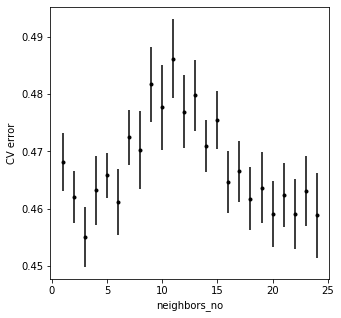

In [7]:
# implement 10-fold cross validation 
summary=pd.DataFrame(columns=['model_complexity','neighbors_no','test_error','fold_no','split_no'])
# split training dataset 
K=10
p=int(2*Mnew/K)
for s in np.arange(0,25):
    indexlist=choice(np.arange(0,len(Xtraining_new)),size=(K,p),replace=False)
    # run over no. neighbors
    for k in np.arange(1,25):
        # estimate cross-validation error 
        for q in np.arange(0,K):
            # filter out cross-validation data
            indx=np.setdiff1d(indexlist.flatten(),indexlist[q])
            CVXtraining, CVYtraining=Xtraining_new[indx], Ytraining_new[indx] 
            CVXtest, CVYtest=Xtraining_new[indexlist[q]], Ytraining_new[indexlist[q]] 
            # train the model 
            model=KNeighborsClassifier(n_neighbors=k,algorithm='brute')
            model.fit(CVXtraining,CVYtraining)
            # calculate cross validation error 
            CVpreds=model.predict(CVXtest)
            df=pd.DataFrame({'true_data': CVYtest, 'model_predictions': CVpreds}
                           ).assign(model_complexity=1./k, neighbors_no=k, fold_no=q, split_no=s)
            df['misclassification_error']=(df['true_data']==df['model_predictions']
                                          ).apply(lambda z: 0 if z==True else 1)
            df=df.groupby(by=['model_complexity','neighbors_no','fold_no','split_no'])['misclassification_error'].sum().reset_index().rename(columns={'misclassification_error':'test_error'})
            summary=pd.concat([summary,df],sort=False)
summary=summary.groupby(by=['model_complexity','neighbors_no','split_no'])['test_error'].sum().reset_index()
summary['test_error']/=2*Mnew
summary=summary.groupby(by=['model_complexity','neighbors_no'])['test_error'].agg(["mean","std"]).reset_index()
print(summary)

# Plot cross-validation error 
fig=plt.figure(figsize=(5., 5.))
plt.errorbar(summary['neighbors_no'].to_numpy(),summary['mean'].to_numpy(),yerr=summary['std'].to_numpy(),fmt='.k')
plt.xlabel('neighbors_no') ; plt.ylabel('CV error')

In [8]:
# calculate test error 
best_no_neighbors=float(summary.copy().loc[summary['mean']==np.min(summary['mean'].to_numpy()),'mean']
                       )+float(summary.copy().loc[summary['mean']==np.min(summary['mean'].to_numpy()),'std'])
summary=summary.assign(threshold=best_no_neighbors).query("mean<=threshold").sort_values(by=['neighbors_no'],ascending=True)
kbest=summary.copy()['neighbors_no'].iloc[0]

# train model on full dataset 
model=KNeighborsClassifier(n_neighbors=kbest,algorithm='brute')
model.fit(Xtraining_new,Ytraining_new)
print(model.get_params())

# calculate test error 
testpreds=model.predict(Xtest)
print("mean accuracy = {}".format(model.score(Xtest,Ytest)))
df=pd.DataFrame({'true_data': Ytest, 'model_predictions': testpreds}).assign(model_complexity=1./kbest, neighbors_no=kbest)
df['test_error']=(df['true_data']==df['model_predictions']).apply(lambda z: 0 if z==True else 1)
df=df.groupby(by=['model_complexity','neighbors_no'])['test_error'].mean().reset_index()
print("estimated test error = {}".format(float(df.test_error)))

{'algorithm': 'brute', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
mean accuracy = 0.734
estimated test error = 0.266


    model_complexity  neighbors_no    mean       std
0           0.041667            24  0.5672  0.038136
1           0.043478            23  0.5676  0.041561
2           0.045455            22  0.5676  0.032052
3           0.047619            21  0.5664  0.036955
4           0.050000            20  0.5664  0.036157
5           0.052632            19  0.5552  0.050836
6           0.055556            18  0.5640  0.042032
7           0.058824            17  0.5520  0.038944
8           0.062500            16  0.5544  0.040320
9           0.066667            15  0.5360  0.032404
10          0.071429            14  0.5284  0.040894
11          0.076923            13  0.5164  0.030397
12          0.083333            12  0.4972  0.032853
13          0.090909            11  0.5364  0.042903
14          0.100000            10  0.5124  0.034191
15          0.111111             9  0.4756  0.028879
16          0.125000             8  0.4464  0.031607
17          0.142857             7  0.4272  0.

Text(0, 0.5, 'CV error')

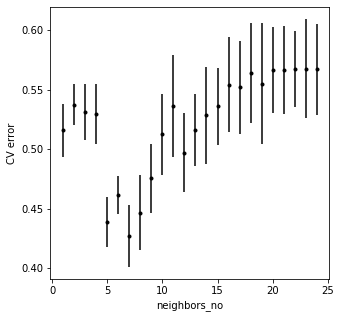

In [43]:
### 3. Invariant metric nearest-neighbors, 
### using Euclidean distance invariant to rotations about the origin.
### To obtain the invariant metric, we rotate both points onto the x-axis
### Distance is then the difference between the x-coordinates 

# define invariant metric 
def invariant_metric(x,y):
    theta1=math.atan2(x[1],x[0])
    theta2=math.atan2(y[1],y[0])
    Rot1=np.matrix([[np.cos(-1.*theta1),-np.sin(-1.*theta1)],
                    [np.sin(-1.*theta1),np.cos(-1.*theta1)]])
    Rot2=np.matrix([[np.cos(-1.*theta2),-np.sin(-1.*theta2)],
                    [np.sin(-1.*theta2),np.cos(-1.*theta2)]])
    v1, v2=np.asarray(np.matmul(Rot1,x)).reshape(-1), np.asarray(np.matmul(Rot2,y)).reshape(-1)
    return abs(v1[0]-v2[0])   

# implement 10-fold cross validation 
summary=pd.DataFrame(columns=['model_complexity','neighbors_no','test_error','fold_no','split_no'])
# split training dataset 
K=10
p=int(2*M/K)
for s in np.arange(0,25):
    indexlist=choice(np.arange(0,len(Xtraining)),size=(K,p),replace=False)
    # run over no. neighbors
    for k in np.arange(1,25):
        # estimate cross-validation error 
        for q in np.arange(0,K):
            # filter out cross-validation data
            indx=np.setdiff1d(indexlist.flatten(),indexlist[q])
            CVXtraining, CVYtraining=Xtraining[indx], Ytraining[indx] 
            CVXtest, CVYtest=Xtraining[indexlist[q]], Ytraining[indexlist[q]] 
            # train the model 
            model=KNeighborsClassifier(n_neighbors=k,algorithm='brute',metric=invariant_metric)
            model.fit(CVXtraining,CVYtraining)
            # calculate cross validation error 
            CVpreds=model.predict(CVXtest)
            df=pd.DataFrame({'true_data': CVYtest, 'model_predictions': CVpreds}
                           ).assign(model_complexity=1./k, neighbors_no=k, fold_no=q, split_no=s)
            df['misclassification_error']=(df['true_data']==df['model_predictions']
                                          ).apply(lambda z: 0 if z==True else 1)
            df=df.groupby(by=['model_complexity','neighbors_no','fold_no','split_no'])['misclassification_error'].sum().reset_index().rename(columns={'misclassification_error':'test_error'})
            summary=pd.concat([summary,df],sort=False)
summary=summary.groupby(by=['model_complexity','neighbors_no','split_no'])['test_error'].sum().reset_index()
summary['test_error']/=2*M
summary=summary.groupby(by=['model_complexity','neighbors_no'])['test_error'].agg(["mean","std"]).reset_index()
print(summary)

# Plot cross-validation error 
fig=plt.figure(figsize=(5., 5.))
plt.errorbar(summary['neighbors_no'].to_numpy(),summary['mean'].to_numpy(),yerr=summary['std'].to_numpy(),fmt='.k')
plt.xlabel('neighbors_no') ; plt.ylabel('CV error')



In [44]:
# calculate test error 
best_no_neighbors=float(summary.copy().loc[summary['mean']==np.min(summary['mean'].to_numpy()),'mean']
                       )+float(summary.copy().loc[summary['mean']==np.min(summary['mean'].to_numpy()),'std'])
summary=summary.assign(threshold=best_no_neighbors).query("mean<=threshold").sort_values(by=['neighbors_no'],ascending=True)
kbest=summary.copy()['neighbors_no'].iloc[0]

# train model on full dataset 
model=KNeighborsClassifier(n_neighbors=kbest,algorithm='brute',metric=invariant_metric)
model.fit(Xtraining,Ytraining)
print(model.get_params())

# calculate test error 
testpreds=model.predict(Xtest)
print("mean accuracy = {}".format(model.score(Xtest,Ytest)))
df=pd.DataFrame({'true_data': Ytest, 'model_predictions': testpreds}).assign(model_complexity=1./kbest, neighbors_no=kbest)
df['test_error']=(df['true_data']==df['model_predictions']).apply(lambda z: 0 if z==True else 1)
df=df.groupby(by=['model_complexity','neighbors_no'])['test_error'].mean().reset_index()
print("estimated test error = {}".format(float(df.test_error)))

{'algorithm': 'brute', 'leaf_size': 30, 'metric': <function invariant_metric at 0x1a1e9b08c0>, 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
mean accuracy = 0.489
estimated test error = 0.511


    model_complexity  neighbors_no  mean  std
0           0.041667            24   0.5  0.0
1           0.043478            23   0.5  0.0
2           0.045455            22   0.5  0.0
3           0.047619            21   0.5  0.0
4           0.050000            20   0.5  0.0
5           0.052632            19   0.5  0.0
6           0.055556            18   0.5  0.0
7           0.058824            17   0.5  0.0
8           0.062500            16   0.5  0.0
9           0.066667            15   0.5  0.0
10          0.071429            14   0.5  0.0
11          0.076923            13   0.5  0.0
12          0.083333            12   0.5  0.0
13          0.090909            11   0.5  0.0
14          0.100000            10   0.5  0.0
15          0.111111             9   0.5  0.0
16          0.125000             8   0.5  0.0
17          0.142857             7   0.5  0.0
18          0.166667             6   0.5  0.0
19          0.200000             5   0.5  0.0
20          0.250000             4

Text(0, 0.5, 'CV error')

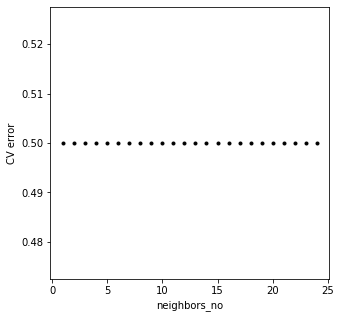

In [54]:
### 4. Tangent distance nearest-neighbors.

# define tangent distance 
def tangent_distance(x,y):
    Rot=np.matrix([[0,-1],
                    [1,0]])
    v1=np.matmul(Rot,x)
    v2=np.matmul(Rot,y)
    v1=np.round(v1/np.linalg.norm(v1),2)
    v2=np.round(v2/np.linalg.norm(v2),2)
    if ((np.array_equal(v1,v2))or(np.array_equal(v1,-v2))):
        return invariant_metric(x,y)
    else: 
        return 0
    
# implement 10-fold cross validation 
summary=pd.DataFrame(columns=['model_complexity','neighbors_no','test_error','fold_no','split_no'])
# split training dataset 
K=10
p=int(2*M/K)
for s in np.arange(0,25):
    indexlist=choice(np.arange(0,len(Xtraining)),size=(K,p),replace=False)
    # run over no. neighbors
    for k in np.arange(1,25):
        # estimate cross-validation error 
        for q in np.arange(0,K):
            # filter out cross-validation data
            indx=np.setdiff1d(indexlist.flatten(),indexlist[q])
            CVXtraining, CVYtraining=Xtraining[indx], Ytraining[indx] 
            CVXtest, CVYtest=Xtraining[indexlist[q]], Ytraining[indexlist[q]] 
            # train the model 
            model=KNeighborsClassifier(n_neighbors=k,algorithm='brute',metric=tangent_distance)
            model.fit(CVXtraining,CVYtraining)
            # calculate cross validation error 
            CVpreds=model.predict(CVXtest)
            df=pd.DataFrame({'true_data': CVYtest, 'model_predictions': CVpreds}
                           ).assign(model_complexity=1./k, neighbors_no=k, fold_no=q, split_no=s)
            df['misclassification_error']=(df['true_data']==df['model_predictions']
                                          ).apply(lambda z: 0 if z==True else 1)
            df=df.groupby(by=['model_complexity','neighbors_no','fold_no','split_no'])['misclassification_error'].sum().reset_index().rename(columns={'misclassification_error':'test_error'})
            summary=pd.concat([summary,df],sort=False)
summary=summary.groupby(by=['model_complexity','neighbors_no','split_no'])['test_error'].sum().reset_index()
summary['test_error']/=2*M
summary=summary.groupby(by=['model_complexity','neighbors_no'])['test_error'].agg(["mean","std"]).reset_index()
print(summary)

# Plot cross-validation error 
fig=plt.figure(figsize=(5., 5.))
plt.errorbar(summary['neighbors_no'].to_numpy(),summary['mean'].to_numpy(),yerr=summary['std'].to_numpy(),fmt='.k')
plt.xlabel('neighbors_no') ; plt.ylabel('CV error')

In [56]:
# calculate test error 
kbest=1

# train model on full dataset 
model=KNeighborsClassifier(n_neighbors=kbest,algorithm='brute',metric=tangent_distance)
model.fit(Xtraining,Ytraining)
print(model.get_params())

# calculate test error 
testpreds=model.predict(Xtest)
print("mean accuracy = {}".format(model.score(Xtest,Ytest)))
df=pd.DataFrame({'true_data': Ytest, 'model_predictions': testpreds}).assign(model_complexity=1./kbest, neighbors_no=kbest)
df['test_error']=(df['true_data']==df['model_predictions']).apply(lambda z: 0 if z==True else 1)
df=df.groupby(by=['model_complexity','neighbors_no'])['test_error'].mean().reset_index()
print("estimated test error = {}".format(float(df.test_error)))

{'algorithm': 'brute', 'leaf_size': 30, 'metric': <function tangent_distance at 0x1a1ea6a050>, 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
mean accuracy = 0.5
estimated test error = 0.5


In [ ]:
### Comments 
### 1. Nearest-neighbor algorithm not that accurate. Mean accuracy only sligthly larger than 0.5
### 2. Nearest-neighbor algorithm with hints improves accuracy significantly. 
###    Mean accuracy increases to 0.734
### 3. Nearest-neighbor algorithm with invariant metric decreases mean accuracy (<0.5). 
###    This is consistent with the considerations made in the book on the digit recognition problem.  
### 4. Nearest-neighbor algorithm with tangent metric increases accuracy with respect to full invariant metric, 
###    but overall for this problem does not lead to any substantial benefit. 
### Best procedure for this dataset is to include hints. 